   age  gender    bmi  children smoker region  annual_income  insurance_cost
0   56    Male  21.09         2     No   West     1045847.67      3438023.56
1   69    Male  34.22         3     No  South     1104483.58      3273727.82
2   46  Female  22.64         4     No  South      561387.75      4167972.13
3   32    Male  20.98         1     No  North      767018.67      4946750.45
4   60    Male  27.57         1     No   East     1624537.55      2003493.89
Linear Regression Performance:
R² Score: -0.00
MAE: ₹992837.21
RMSE: ₹1141473.56

Random Forest Regression Performance:
R² Score: -0.12
MAE: ₹1022439.53
RMSE: ₹1205888.20

Combined Model Performance:
R² Score: -0.06
MAE: ₹1004975.66
RMSE: ₹1174806.15

Enter the following details to predict insurance cost:


Age:  20
Gender (Female, Male):  female
Smoker (No, Yes):  no
Region (East, North, South, West):  north
BMI:  22.64
Annual Income:  4167972.13



Linear Regression Prediction: ₹3282253.46
Random Forest Prediction: ₹2579307.02
Combined Prediction: ₹2790190.95


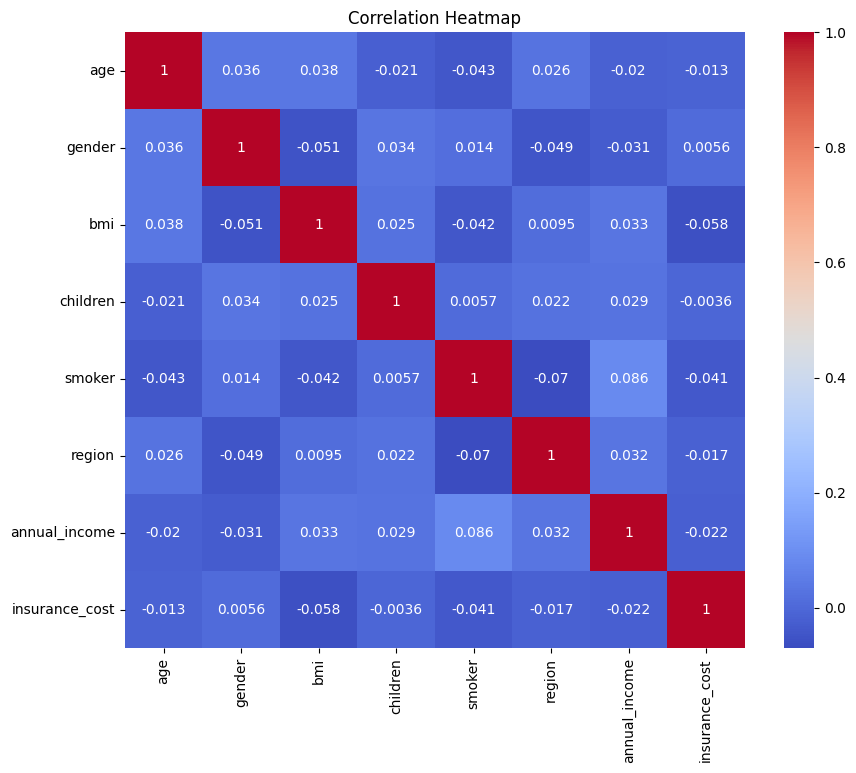

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data=(r"C:\Users\ajayc\Downloads\synthetic_insurance_dataset.csv")  
df=pd.read_csv(data)
print(df.head())

# Check for null values
if df.isnull().sum().sum() > 0:
    print("Warning: Dataset contains null values. Cleaning data...")
    df=df.dropna()

# Encode categorical columns
categorical_columns=['gender', 'smoker', 'region']
label_encoders={col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    df[col]=label_encoders[col].fit_transform(df[col])

# Features and target variable
X=df[['age', 'gender', 'smoker', 'region', 'bmi', 'annual_income']]
y=df['insurance_cost']

# Split dataset
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

# Scale numerical features
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train[['age', 'bmi', 'annual_income']])
X_test_scaled=scaler.transform(X_test[['age', 'bmi', 'annual_income']])
 
 
# Train Linear Regression
linear_model=LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr=linear_model.predict(X_test)

# Train Random Forest Regression
rf_model=RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf=rf_model.predict(X_test)

# Combine predictions using weighted average
weight_lr=0.3  # 30% weight to Linear Regression
weight_rf=0.7  # 70% weight to Random Forest
y_pred_combined=(weight_lr * y_pred_lr)+(weight_rf * y_pred_rf)

# Evaluation metrics
print("Linear Regression Performance:")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.2f}")
print(f"MAE: ₹{mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"RMSE: ₹{np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")

print("\nRandom Forest Regression Performance:")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.2f}")
print(f"MAE: ₹{mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"RMSE: ₹{np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")

print("\nCombined Model Performance:")
print(f"R² Score: {r2_score(y_test, y_pred_combined):.2f}")
print(f"MAE: ₹{mean_absolute_error(y_test, y_pred_combined):.2f}")
print(f"RMSE: ₹{np.sqrt(mean_squared_error(y_test, y_pred_combined)):.2f}")

# Input data for prediction
try:
    print("\nEnter the following details to predict insurance cost:")
    age = int(input("Age: "))
    gender_input=input(f"Gender ({', '.join(label_encoders['gender'].classes_)}): ").strip().capitalize()
    smoker_input=input(f"Smoker ({', '.join(label_encoders['smoker'].classes_)}): ").strip().capitalize()
    region_input=input(f"Region ({', '.join(label_encoders['region'].classes_)}): ").strip().capitalize()
    bmi=float(input("BMI: "))
    annual_income=float(input("Annual Income: "))

    # Encode categorical inputs
    gender_encoded=label_encoders['gender'].transform([gender_input])[0]
    smoker_encoded=label_encoders['smoker'].transform([smoker_input])[0]
    region_encoded=label_encoders['region'].transform([region_input])[0]

    # Scale numerical inputs
    input_data=pd.DataFrame([[age, gender_encoded, smoker_encoded, region_encoded, bmi, annual_income]],
                              columns=['age', 'gender', 'smoker', 'region', 'bmi', 'annual_income'])
    input_data[['age', 'bmi', 'annual_income']] = scaler.transform(input_data[['age', 'bmi', 'annual_income']])

    # Predict using both models
    pred_lr=linear_model.predict(input_data)
    pred_rf=rf_model.predict(input_data)
    pred_combined=(weight_lr * pred_lr) + (weight_rf * pred_rf)

    print(f"\nLinear Regression Prediction: ₹{pred_lr[0]:.2f}")
    print(f"Random Forest Prediction: ₹{pred_rf[0]:.2f}")
    print(f"Combined Prediction: ₹{pred_combined[0]:.2f}")
except Exception as e:
    print(f"Error: {e}")

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


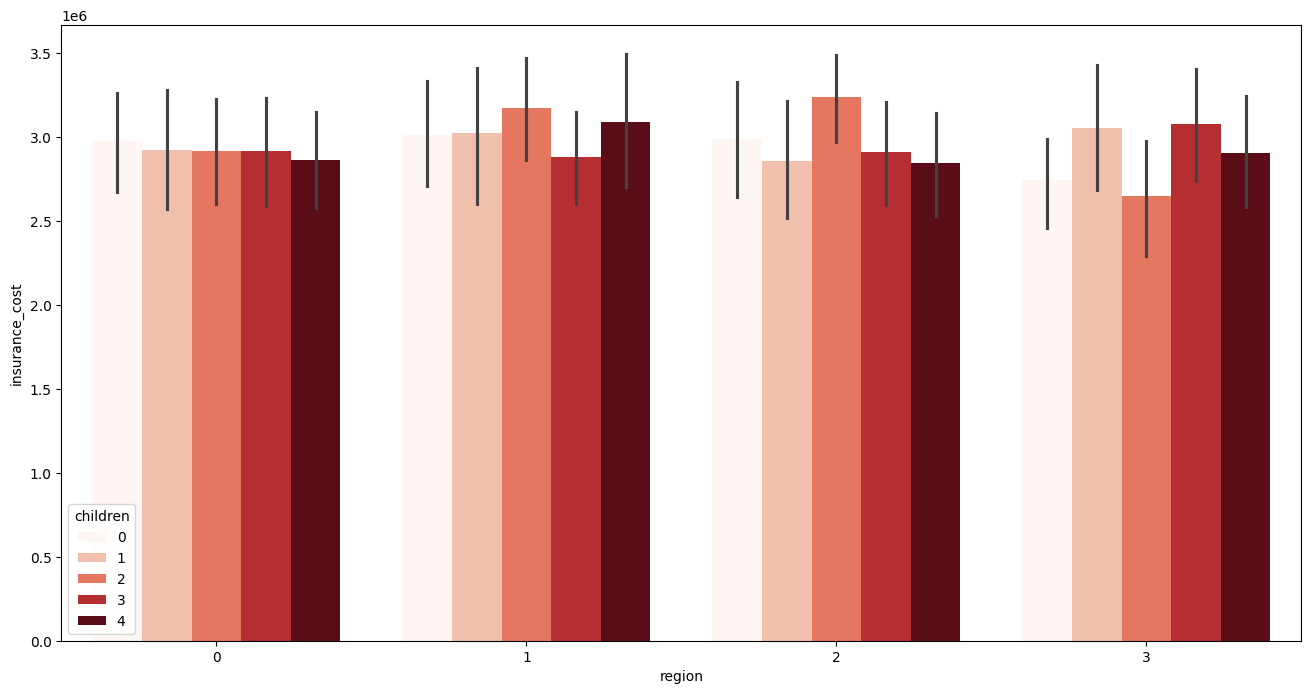

In [5]:
f, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.barplot(x='region', y='insurance_cost', hue='children', data=df, palette='Reds')
plt.show()

In [7]:
# from above graphs south region people smoke more

df[['gender', 'smoker', 'region']] = df[['gender', 'smoker', 'region']].astype('category')
df.dtypes

age                  int64
gender            category
bmi                float64
children             int64
smoker            category
region            category
annual_income      float64
insurance_cost     float64
dtype: object